# 0. Install and Import Dependencies

In [1]:
#%pip install neuralprophet


     ---------------------------------------- 0.0/128.2 kB ? eta -:--:--
     ---------------------------------------- 0.0/128.2 kB ? eta -:--:--
     --- ------------------------------------ 10.2/128.2 kB ? eta -:--:--
     --- ------------------------------------ 10.2/128.2 kB ? eta -:--:--
     -------- ---------------------------- 30.7/128.2 kB 262.6 kB/s eta 0:00:01
     -------- ---------------------------- 30.7/128.2 kB 262.6 kB/s eta 0:00:01
     -------- ---------------------------- 30.7/128.2 kB 262.6 kB/s eta 0:00:01
     ----------- ------------------------- 41.0/128.2 kB 122.9 kB/s eta 0:00:01
     ----------- ------------------------- 41.0/128.2 kB 122.9 kB/s eta 0:00:01
     ----------- ------------------------- 41.0/128.2 kB 122.9 kB/s eta 0:00:01
     ----------- ------------------------- 41.0/128.2 kB 122.9 kB/s eta 0:00:01
     ----------------- ------------------- 61.4/128.2 kB 121.3 kB/s eta 0:00:01
     ----------------- ------------------- 61.4/128.2 kB 121.3 kB/

  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> [1235 lines of output]
      Ignoring numpy: markers 'python_version == "3.7" and (platform_machine != "arm64" or platform_system != "Darwin") and platform_machine != "aarch64"' don't match your environment
      Ignoring numpy: markers 'python_version == "3.8" and (platform_machine != "arm64" or platform_system != "Darwin") and platform_machine != "aarch64"' don't match your environment
      Ignoring numpy: markers 'python_version == "3.7" and platform_machine == "aarch64"' don't match your environment
      Ignoring numpy: markers 'python_version == "3.8" and platform_machine == "aarch64"' don't match your environment
      Ignoring numpy: markers 'python_version == "3.8" and platform_machine == "arm64" and platform_system == "Darwin"' don't match your environment
      Ignoring numpy: markers 'python_version == "3.9" and platform_machine == "arm


     ------ -------------------------------- 2.3/14.6 MB 301.7 kB/s eta 0:00:42
     ------ -------------------------------- 2.3/14.6 MB 301.7 kB/s eta 0:00:42
     ------ -------------------------------- 2.3/14.6 MB 301.7 kB/s eta 0:00:42
     ------ -------------------------------- 2.3/14.6 MB 301.7 kB/s eta 0:00:42
     ------ -------------------------------- 2.3/14.6 MB 301.7 kB/s eta 0:00:42
     ------ -------------------------------- 2.3/14.6 MB 301.7 kB/s eta 0:00:42
     ------ -------------------------------- 2.3/14.6 MB 287.0 kB/s eta 0:00:44
     ------ -------------------------------- 2.3/14.6 MB 287.0 kB/s eta 0:00:44
     ------ -------------------------------- 2.3/14.6 MB 287.0 kB/s eta 0:00:44
     ------ -------------------------------- 2.3/14.6 MB 287.0 kB/s eta 0:00:44
     ------ -------------------------------- 2.3/14.6 MB 287.0 kB/s eta 0:00:44
     ------ -------------------------------- 2.3/14.6 MB 287.0 kB/s eta 0:00:44
     ------ ---------------------------

In [25]:
import pandas as pd
from neuralprophet import NeuralProphet
from matplotlib import pyplot as plt
import pickle

# 1. Read in Data and Process Dates

In [26]:
df = pd.read_csv('weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [27]:
df.Location.unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [28]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [29]:
melb = df[df['Location']=='Melbourne']
melb['Date'] = pd.to_datetime(melb['Date'])
melb.tail()

WARNING - (py.warnings._showwarnmsg) - C:\Users\Guide Info\AppData\Local\Temp\ipykernel_27288\2985917187.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  melb['Date'] = pd.to_datetime(melb['Date'])



,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
70388,2017-06-21,Melbourne,7.8,13.5,0.6,0.6,0.0,NNW,24.0,W,...,100.0,80.0,1028.8,1028.4,7.0,7.0,11.2,12.7,No,No
70389,2017-06-22,Melbourne,6.7,14.1,0.2,0.6,0.0,N,24.0,NNE,...,93.0,56.0,1028.2,1024.8,7.0,7.0,7.5,13.5,No,No
70390,2017-06-23,Melbourne,7.4,14.9,0.0,1.6,6.0,NNW,44.0,N,...,77.0,63.0,1018.8,1013.8,1.0,7.0,9.1,12.5,No,Yes
70391,2017-06-24,Melbourne,8.3,12.3,1.4,1.8,5.6,SW,30.0,WNW,...,75.0,63.0,1018.7,1017.4,2.0,7.0,9.6,11.2,Yes,No
70392,2017-06-25,Melbourne,8.6,14.3,0.0,2.8,3.8,NW,35.0,N,...,67.0,56.0,1017.4,1015.0,7.0,7.0,9.3,13.4,No,Yes


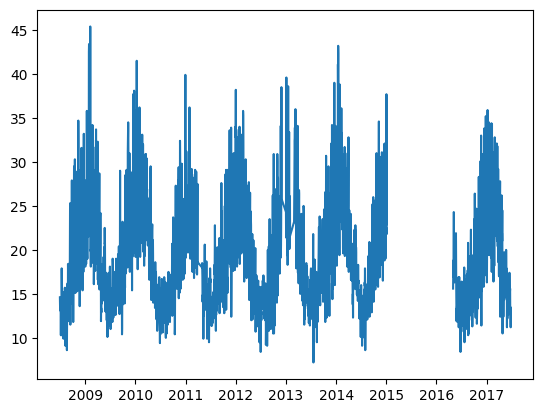

In [30]:
plt.plot(melb['Date'], melb['Temp3pm'])
plt.show()

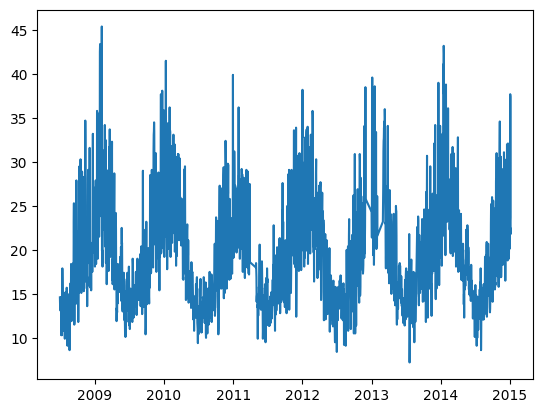

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year
67200,2008-07-01,Melbourne,9.5,15.4,2.0,2.8,7.0,W,63.0,W,...,38.0,1006.8,1010.3,1.0,7.0,11.0,14.6,Yes,No,2008
67201,2008-07-02,Melbourne,11.0,14.5,0.6,5.2,4.0,W,63.0,W,...,52.0,1013.4,1016.2,7.0,4.0,11.8,13.7,No,Yes,2008
67202,2008-07-03,Melbourne,8.4,14.1,1.4,2.0,0.8,W,39.0,W,...,58.0,1024.8,1024.3,7.0,7.0,10.6,13.9,Yes,No,2008
67203,2008-07-04,Melbourne,9.1,14.5,0.6,1.8,4.2,E,19.0,NNW,...,49.0,1030.2,1029.0,7.0,6.0,10.2,13.1,No,No,2008
67204,2008-07-05,Melbourne,4.3,15.5,0.0,0.8,8.4,N,52.0,N,...,52.0,1028.9,1024.9,2.0,5.0,5.5,14.6,No,No,2008


In [34]:
melb['Year'] = melb['Date'].apply(lambda x: x.year)
melb = melb[melb['Year']<=2015]
plt.plot(melb['Date'], melb['Temp3pm'])
plt.show()
melb.head()

In [33]:
data = melb[['Date', 'Temp3pm']] 
data.dropna(inplace=True)
data.columns = ['ds', 'y'] 
data.tail()

WARNING - (py.warnings._showwarnmsg) - C:\Users\Guide Info\AppData\Local\Temp\ipykernel_27288\3857951140.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)



,ds,y
69486,2015-01-01,23.7
69487,2015-01-02,37.7
69488,2015-01-03,37.4
69489,2015-01-04,21.8
69490,2015-01-05,22.4


# 2. Train Model

In [35]:
m = NeuralProphet()

In [36]:
model = m.fit(data, freq='D', epochs=1000)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Guide Info\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.694% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Guide Info\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\Guide Info\AppData\Loc


Epoch 1000: 100%|██████████| 1000/1000 [00:00<00:00, 4444.91it/s, loss=0.0363, v_num=0, MAE=2.990, RMSE=3.970, Loss=0.0338, RegLoss=0.000]   


# 3. Forecast Away

In [38]:
future = m.make_future_dataframe(data, periods=900)
forecast = m.predict(future)
forecast.tail()

WARNING - (py.warnings._showwarnmsg) - c:\Users\Guide Info\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.694% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Guide Info\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\Guide Info\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated an

WARNING - (py.warnings._showwarnmsg) - c:\Users\Guide Info\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\Guide Info\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
WARNING - (py.warnings._showwarnmsg) - c:\Users\Guide Info\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and wi

Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 200.08it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


,ds,y,yhat1,trend,season_yearly,season_weekly
895,2017-06-19,None,15.310368,20.984238,-5.379430,-0.294440
896,2017-06-20,None,15.880786,20.985210,-5.436409,0.331985
897,2017-06-21,None,15.508582,20.986183,-5.489173,0.011573
898,2017-06-22,None,15.463710,20.987156,-5.537874,0.014429
899,2017-06-23,None,15.310538,20.988127,-5.582184,-0.095404


In [39]:
plot1 = m.plot(forecast)

WARNING - (py.warnings._showwarnmsg) - c:\Users\Guide Info\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\plot_forecast_plotly.py:92: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fcst = fcst.fillna(value=np.nan)

WARNING - (py.warnings._showwarnmsg) - c:\Users\Guide Info\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\plot_forecast_plotly.py:94: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ds = fcst["ds"].dt.to_pydatetime()



ImportError: Please install ipywidgets>=7.0.0 to use the FigureWidget class

In [40]:
plt2 = m.plot_components(forecast)

WARNING - (py.warnings._showwarnmsg) - c:\Users\Guide Info\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\plot_forecast_plotly.py:272: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`




ImportError: Please install ipywidgets>=7.0.0 to use the FigureWidget class

# 4. Save Model

In [41]:
with open('saved_model.pkl', "wb") as f:
    pickle.dump(m, f)

In [42]:
del m

In [43]:
with open('saved_model.pkl', "rb") as f:
    m = pickle.load(f)

In [44]:
future = m.make_future_dataframe(data, periods=900)
forecast = m.predict(future)
forecast.head()

WARNING - (py.warnings._showwarnmsg) - c:\Users\Guide Info\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.694% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Guide Info\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - c:\Users\Guide Info\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - De

AttributeError: 'Trainer' object has no attribute '_accelerator_connector'

In [45]:
plot1 = m.plot(forecast)

WARNING - (py.warnings._showwarnmsg) - c:\Users\Guide Info\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\plot_forecast_plotly.py:92: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


WARNING - (py.warnings._showwarnmsg) - c:\Users\Guide Info\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\plot_forecast_plotly.py:94: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result




ImportError: Please install ipywidgets>=7.0.0 to use the FigureWidget class